# Uncapacitated Facility Location Problem

## Initialization

In [28]:
# autoreload external files
%reload_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import benchmark as bnc

## Run benchmark

In [29]:
# instance params
c_long = [10,20,40,60,80,120]
l_long = [2,4,8,16,24,32]
s_long = np.array(np.meshgrid(c_long,l_long)).T.reshape(-1,2)    
r_long = 10    

c_short = [5,15,25]
l_short = [2,4,6]
s_short = np.array(np.meshgrid(c_short,l_short)).T.reshape(-1,2)    
r_short = 3

# run benchmark
runner = bnc.Runner()    
#runner.run_benchmark(s_long, r_long)
#runner.run_benchmark(s_short, r_short)

## Load results

In [30]:
# load dataframe
# folder = runner.RUN_PATH
folder = '2911'
p = os.path.join(runner.DATA_PATH, folder)
df_l = runner.load_dataframe(path=p)
print(f"Loaded data ({len(df_l)} rows)")

Loaded data (360 rows)


## Plot results

In [31]:
plt.style.use('seaborn-muted')
# plt.style.use('tableau-colorblind10')
# plt.style.use('seaborn')
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.edgecolor"] = "w"
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.linestyle'] = '-.'
plt.rcParams['grid.linewidth'] = 0.25

### Total Compute Time Ratio

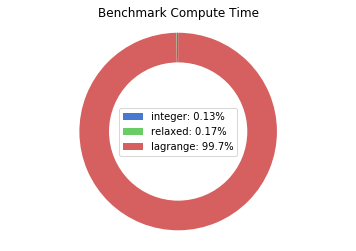

In [32]:
# total compute time 
data = df_l.loc[:,['integer_time', 'relaxed_time', 'lagrange_time']]
data = data.sum(axis=0)

fig, ax1 = plt.subplots()
ax1.pie(data, startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.legend(['integer: 0.13%','relaxed: 0.17%','lagrange: 99.7%'], loc='center')
ax1.axis('equal')
ax1.set_title("Benchmark Compute Time")
plt.show()

### Compute Time by Clients

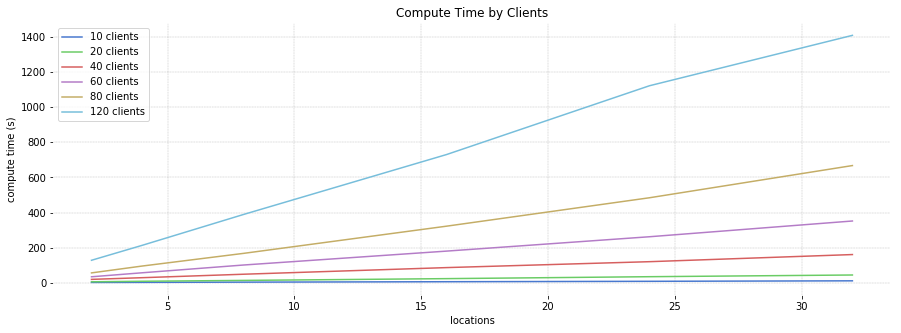

In [33]:
# compute time by clients count
data = df_l.loc[:,['clients', 'locations','lagrange_time']]
grp = data.groupby('clients')
#print(grp.head())

fig,ax = plt.subplots(figsize=(15,5))

for n,g in grp:
    d = g.groupby('locations').median()
    #print(d)
    ax.plot(d['lagrange_time'], label=f'{n} clients')
    pass

ax.set_title('Compute Time by Clients')
ax.set_xlabel('locations')
ax.set_ylabel('compute time (s)')
ax.legend()
plt.show()

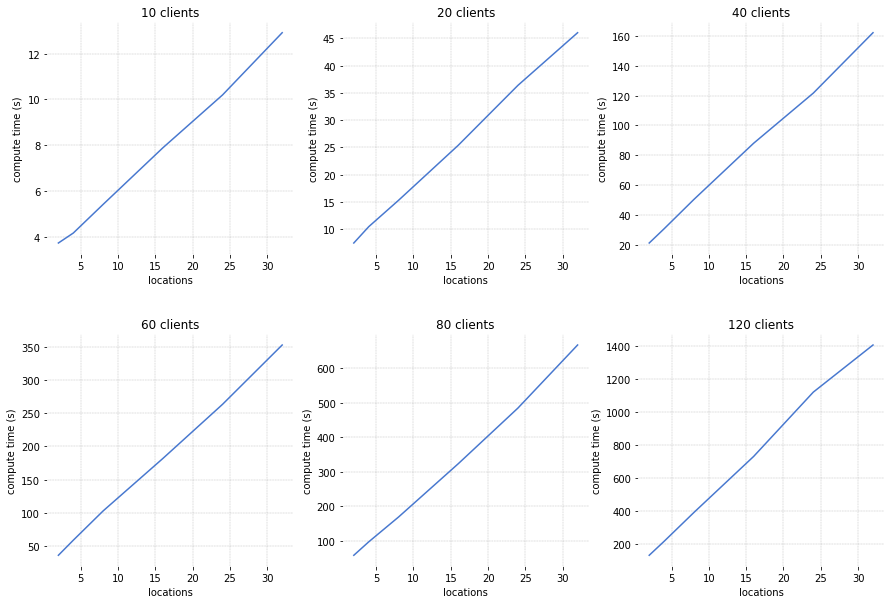

In [34]:
# clients - time relation
#data = df_l.loc[:,['clients', 'locations', 'integer_time', 'relaxed_time', 'lagrange_time']]
data = df_l.loc[:,['clients', 'locations','lagrange_time']]
grp = data.groupby(['clients'])

cols = 3
rows = len(grp) // cols + len(grp) % cols
gs = gridspec.GridSpec(rows, cols)
gs.update(hspace=0.35)
fig1 = plt.figure(figsize=(15,5*rows))
ax = []

i=0
for n,g in grp:    
    #subplot index
    row = i // cols
    col = i % cols
    #select data
    g = g.iloc[:,1:]    
    g = g.groupby(['locations']).median()
    #plot data    
    ax.append(fig1.add_subplot(gs[row, col]))
    ax[-1].set_title(f'{n} clients')
    ax[-1].set_xlabel('locations')
    ax[-1].set_ylabel('compute time (s)')    
#     g.plot(ax=ax[-1])
    ax[-1].plot(g)
    i += 1
    pass

### Compute Time by Locations

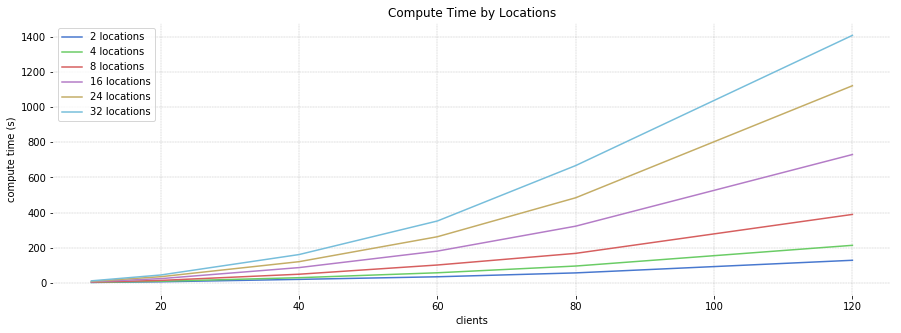

In [35]:
# compute time by locations count
data = df_l.loc[:,['clients', 'locations','lagrange_time']]
grp = data.groupby('locations')
#print(grp.head())

fig,ax = plt.subplots(figsize=(15,5))

for n,g in grp:
    d = g.groupby('clients').median()
    #print(d)
    ax.plot(d['lagrange_time'], label=f'{n} locations')
    pass

ax.set_title('Compute Time by Locations')
ax.set_xlabel('clients')
ax.set_ylabel('compute time (s)')
ax.legend()
plt.show()
    

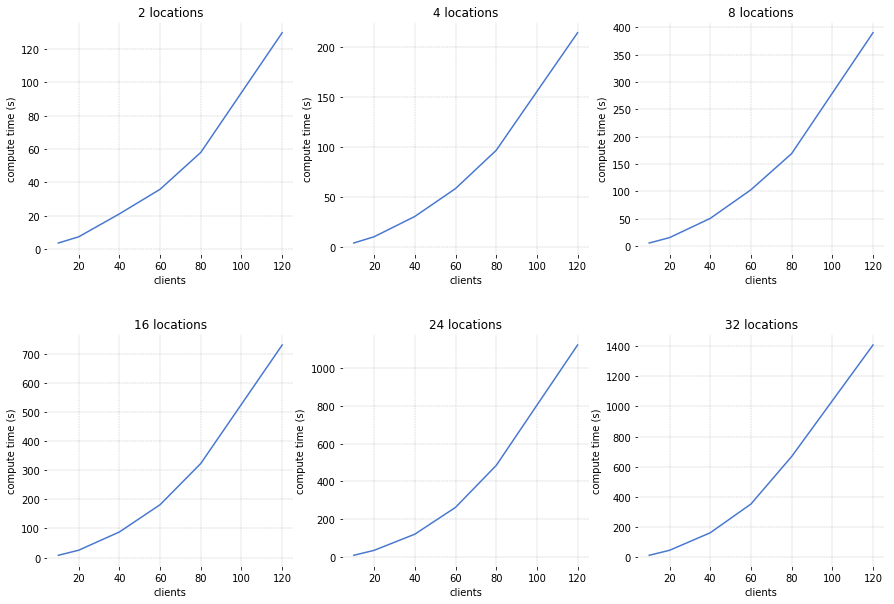

In [36]:
# locations - time relation
#data = df_l.loc[:,['clients', 'locations', 'integer_time', 'relaxed_time', 'lagrange_time']]
data = df_l.loc[:,['clients', 'locations','lagrange_time']]
grp = data.groupby(['locations'])

cols = 3
rows = len(grp) // cols + len(grp) % cols
gs = gridspec.GridSpec(rows, cols)
gs.update(hspace=0.35)
fig1 = plt.figure(figsize=(15,5*rows))
ax = []

i=0
for n,g in grp:
    #subplot index
    row = i // cols
    col = i % cols
    #select data 
    g = g.groupby(['clients']).median().loc[:,['lagrange_time']]
    #g = g.loc[:, ['integer_time', 'relaxed_time', 'lagrange_time']]
    #plot data
    ax.append(fig1.add_subplot(gs[row, col]))    
    ax[-1].set_title(f'{n} locations') 
    ax[-1].set_xlabel('clients')
    ax[-1].set_ylabel('compute time (s)')
#     g.plot(ax=ax[-1])
    ax[-1].plot(g)
    i += 1
    

### Approximation Error

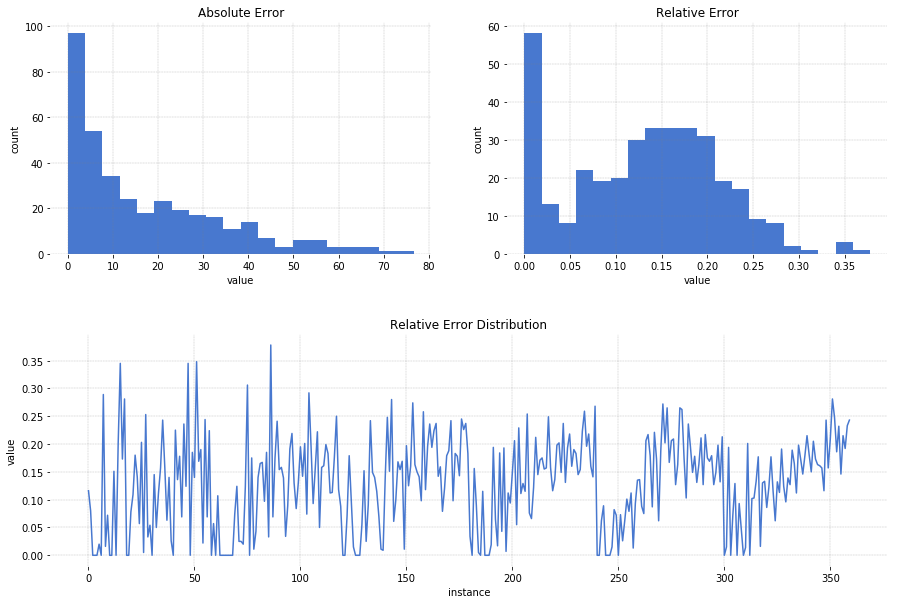

In [37]:
# lagrange error
# df_l = df_l.sort_values(by='locations', ascending=True)
data = df_l.loc[:, ['integer_z','lagrange_z']]

# compute error
error = []
error_r = []
for idx, r in data.iterrows():
    e = r['lagrange_z'] - r['integer_z']
    e_r = r['lagrange_z'] / r['integer_z'] - 1
    e = round(e,3)
    e_r = round(e_r,3)
    error.append(e)
    error_r.append(e_r)

# plot
rows = 2
cols = 2
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.35)

plt.subplot(rows,cols,1, title='Absolute Error', xlabel='value' ,ylabel='count')
plt.hist(error, bins=20)

plt.subplot(rows,cols,2, title='Relative Error', xlabel='value', ylabel='count')
plt.hist(error_r, bins=20)

ax = plt.subplot(rows, 1, 2, title='Relative Error Distribution', xlabel='instance' ,ylabel='value')
ax.plot(error_r)
ax.grid()
plt.grid()

plt.show()

### Convergence Speed

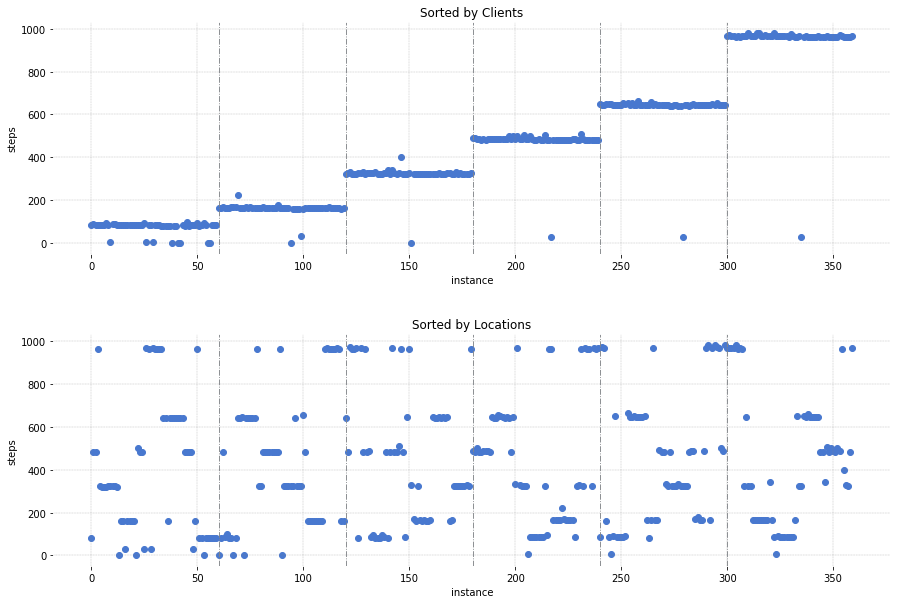

In [38]:
# convergence speed
data = df_l.loc[:, ['clients','locations','sg_z']]
data = data.sort_values(by='clients', ascending=True)

sg_data = []
sg_steps = []
clients = []
for idx, r in data.iterrows():
    # decode array data
    sg = r['sg_z'].replace(r'[', '').replace(r']', '')
    data = np.fromstring(sg, dtype=np.float, sep=' ')
    sg_data.append(data)
    sg_steps.append(len(data))
    # get locations num
    clients.append(r['clients'])

clients = np.unique(clients)
b = len(sg_data) // len(clients)
v = np.arange(b,len(sg_data),b)

# plot
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.35)
plt.subplot(211)
plt.xlabel('instance')
plt.ylabel('steps')
plt.title('Sorted by Clients')
plt.scatter(x=np.arange(0,len(sg_steps)), y=sg_steps)

for c in v:
    plt.axvline(x=c,linestyle='-.',color='#828589',linewidth=0.9)


# convergence speed
data = df_l.loc[:, ['clients','locations','sg_z']]
data = data.sort_values(by='locations', ascending=True)

sg_data = []
sg_steps = []
locations = []
for idx, r in data.iterrows():
    # decode array data
    sg = r['sg_z'].replace(r'[', '').replace(r']', '')
    data = np.fromstring(sg, dtype=np.float, sep=' ')
    sg_data.append(data)
    sg_steps.append(len(data))
    # get locations num
    locations.append(r['locations'])

locations = np.unique(locations)
b = len(sg_data) // len(locations)
v = np.arange(b,len(sg_data),b)

# plot
plt.subplot(212)
plt.xlabel('instance')
plt.ylabel('steps')
plt.title('Sorted by Locations')
plt.scatter(x=np.arange(0,len(sg_steps)), y=sg_steps)

for l in v:
    plt.axvline(x=l,linestyle='-.',color='#828589',linewidth=0.9)
plt.show()    